In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

#Import data
train = pd.read_csv("Data\Housing_dataset_train.csv")
test = pd.read_csv("Data\Housing_dataset_test.csv")
train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [ ]:
train['ind'] = 1
test['ind'] = 0

# Concatenate train and test DataFrames
combined_df = pd.concat([train, test])

combined_df

,ID,loc,title,bedroom,bathroom,parking_space,price,ind
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,1
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814,1
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,1
...,...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,0
5996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,0
5997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,0
5998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,0


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             20000 non-null  int64  
 1   loc            18187 non-null  object 
 2   title          18278 non-null  object 
 3   bedroom        18201 non-null  float64
 4   bathroom       18195 non-null  float64
 5   parking_space  18189 non-null  float64
 6   price          14000 non-null  float64
 7   ind            20000 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In this dataset, we have information on various features related to houses, such as the number of bathrooms, bedrooms, parking spaces, and their corresponding prices. Let's take a closer look at the summary statistics for each feature:

In [2]:
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

The "loc" feature has 1813 missing values, accounting for approximately 12.95% of the total data. These missing values represent the location of the houses in the dataset.

The "title" feature has 1722 missing values, which accounts for approximately 12.30% of the total data. The "title" refers to the type of property or house (e.g., duplex, apartment, mansion).

The "bedroom" feature has 1799 missing values, representing approximately 12.85% of the total data. The number of bedrooms is an important factor affecting house prices. 

The "bathroom" feature has 1805 missing values, accounting for approximately 12.89% of the total data. 

Similar to the number of bedrooms, the number of bathrooms significantly impacts house prices.

The "parking_space" feature has 1811 missing values, representing approximately 12.93% of the total data.

Adequately dealing with these missing values is essential, as these variables can be significant factors in determining house prices.


Fortunately, the target variable "price" has no missing values, which is essential for building predictive models. A complete target variable ensures that we can use the available data to train and test the model effectively.

In [23]:
combined_df[['bathroom','bedroom','parking_space','price']].describe()

,bathroom,bedroom,parking_space,price
count,18195.000000,18201.000000,18189.000000,1.400000e+04
mean,3.124815,4.315312,3.157458,2.138082e+06
std,2.035028,2.445600,1.601164,1.083057e+06
min,1.000000,1.000000,1.000000,4.319673e+05
25%,1.000000,2.000000,2.000000,1.393990e+06
50%,2.000000,4.000000,3.000000,1.895223e+06
75%,5.000000,6.000000,4.000000,2.586699e+06
max,7.000000,9.000000,6.000000,1.656849e+07


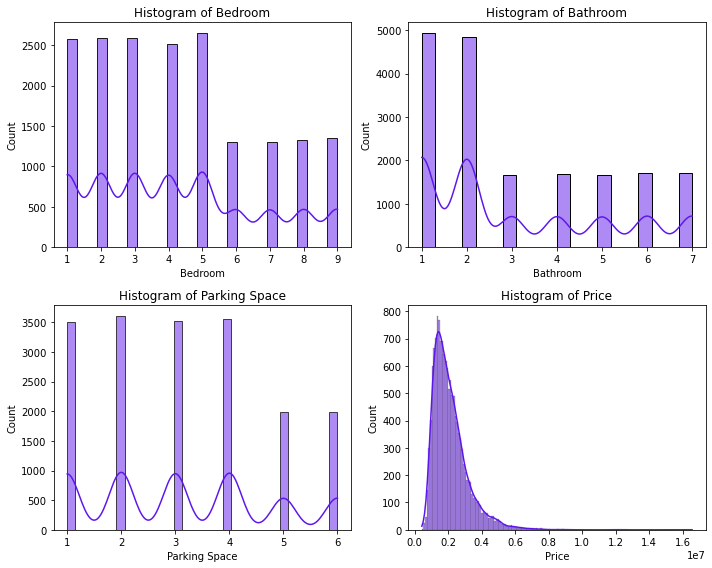

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = combined_df[['bedroom', 'bathroom', 'parking_space', 'price']]

# Set the color for the histograms
hue_color = "#5e17eb"

# Create a 2x2 grid for the histograms
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Histogram for 'bedroom'
sns.histplot(data['bedroom'], color=hue_color, kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Bedroom')
axes[0, 0].set_title('Histogram of Bedroom')

# Histogram for 'bathroom'
sns.histplot(data['bathroom'], color=hue_color, kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Bathroom')
axes[0, 1].set_title('Histogram of Bathroom')

# Histogram for 'parking_space'
sns.histplot(data['parking_space'], color=hue_color, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Parking Space')
axes[1, 0].set_title('Histogram of Parking Space')

# Histogram for 'price'
sns.histplot(data['price'], color=hue_color, kde=True, ax=axes[1, 1])
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_title('Histogram of Price')

plt.tight_layout()
plt.show()


The distribution of the number of bedrooms seems to be approximately symmetrical although slightly positively skewed. Most houses have 2 to 6 bedrooms, with a few outliers having as few as 1 bedroom and as many as 9 bedrooms. The mean (4.32) is greater than the median (4.00), indicating a slight positive skewness. The distribution might be slightly right-skewed, with a slightly longer right tail. However, the difference between the mean and median is relatively small, suggesting a relatively symmetrical distribution.

The distribution of the number of bathrooms appears to be positively skewed, with most houses having 1, 2, or 3 bathrooms. Some houses have up to 7 bathrooms, which might be considered outliers. The mean (3.12) is less than the median (2.00), indicating a positive skewness. The distribution is right-skewed, with a longer right tail. The 75th percentile (5.00) is higher than the median, further confirming the presence of right skewness. This suggests that a few houses with a higher number of bathrooms contribute to the elongated right tail.


The distribution of parking spaces also appears to be approximately symmetrical. Most houses have 2 to 4 parking spaces, with a few outliers having as few as 1 space and as many as 6 spaces. The mean (3.16) is greater than the median (3.00), indicating a slight positive skewness. The distribution might be slightly right-skewed, with a slightly longer right tail. Similar to the bedroom feature, the difference between the mean and median is relatively small, suggesting a relatively symmetrical distribution.

The distribution of house prices is highly positively skewed, with most prices falling in the lower range. Some houses have significantly higher prices, leading to outliers. The mean (2,138,082) is greater than the median (1,895,223), indicating a positive skewness. The distribution is likely to be right-skewed, with a longer right tail. The 75th percentile (2,586,699) is also higher than the median, further confirming the presence of right skewness. This suggests that a few houses with higher prices contribute to the elongated right tail, pulling the mean higher than the median.

In Summary;

Outliers are present in the bathroom, bedroom, parking space, and price features.

These outliers may significantly impact the model's performance and predictions, and we may need to handle them carefully during the modeling process.

Depending on the model chosen, we can consider various techniques such as data transformation, outlier removal, or robust modeling to address the effect of outliers on our predictive model.


In [20]:
combined_df[['loc','title']].describe()

,loc,title
count,18187,18278
unique,36,10
top,Anambra,Flat
freq,543,2026


In [30]:
combined_df['title'].value_counts()

Flat                    2026
Mansion                 1995
Townhouse               1980
Apartment               1973
Semi-detached duplex    1939
Detached duplex         1938
Penthouse               1935
Bungalow                1934
Terrace duplex          1893
Cottage                  665
Name: title, dtype: int64

In [31]:
combined_df['loc'].value_counts().head(15)

Anambra        543
Benue          543
Borno          539
Kaduna         536
Ogun           530
Oyo            524
Nasarawa       521
Kano           521
Katsina        520
Bauchi         517
Adamawa        516
Kebbi          516
Zamfara        513
Cross River    512
Yobe           512
Name: loc, dtype: int64

In [32]:
combined_df['loc'].value_counts().tail(15)

Bayelsa      499
Kogi         498
Plateau      497
Delta        494
Ebonyi       493
Jigawa       492
Niger        489
Sokoto       489
Abia         487
Akwa Ibom    484
Enugu        483
Taraba       482
Kwara        477
Rivers       467
Edo          467
Name: loc, dtype: int64

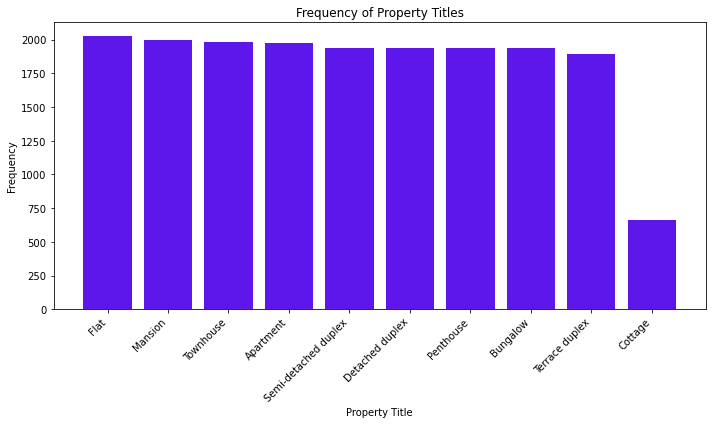

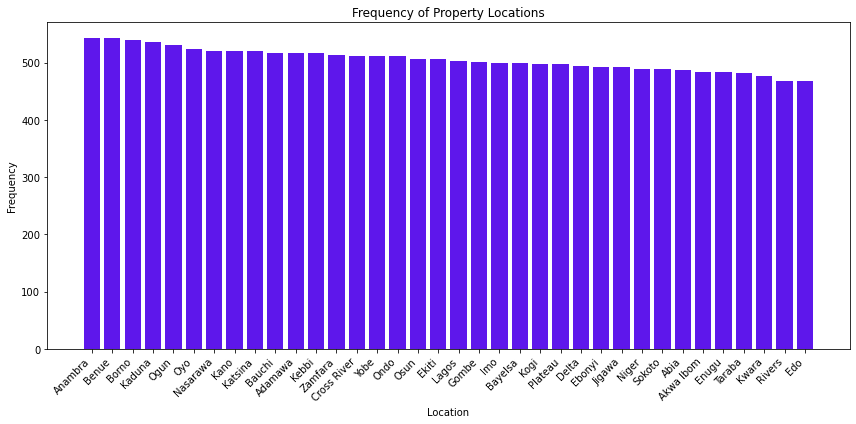

In [22]:
import matplotlib.pyplot as plt

# Value counts of 'title' and 'loc' columns
title_counts = combined_df['title'].value_counts()
loc_counts = combined_df['loc'].value_counts()

# Plotting bar chart for 'title'
plt.figure(figsize=(10, 6))
plt.bar(title_counts.index, title_counts.values, color='#5e17eb')
plt.xlabel('Property Title')
plt.ylabel('Frequency')
plt.title('Frequency of Property Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting bar chart for 'loc'
plt.figure(figsize=(12, 6))
plt.bar(loc_counts.index, loc_counts.values, color='#5e17eb')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Frequency of Property Locations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Based on the given data, we have two categorical features: 'loc' and 'title'.Upon analyzing the frequency counts of property titles and locations, observations can be made.

After analysis, it is seen that:

The most common property type is "Flat," with a frequency of 2026.Followed closely are "Mansion" and "Townhouse" with frequencies of 1995 and 1980, respectively.
"Apartment," "Semi-detached duplex," and "Detached duplex" have similar frequencies ranging from 1938 to 1973.
"Cottage" has the lowest frequency among the property titles, with only 665 occurrences.

For property Locations:
The states "Anambra" and "Benue" have the highest number of properties, with each having 543 occurrences in the dataset.
Several states like "Borno," "Kaduna," "Ogun," and "Oyo" also have a high frequency of properties, ranging from 530 to 543.
On the other hand, states like "Edo," "Rivers," "Kwara," and "Taraba" have the lowest number of properties, ranging from 467 to 477.


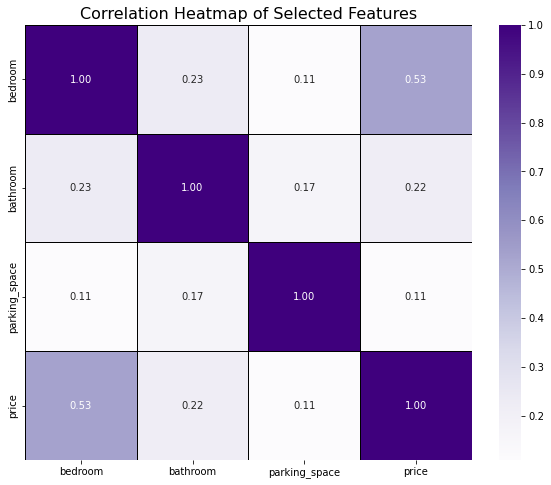

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# Select the relevant features for the correlation heatmap
selected_features = combined_df[['bedroom', 'bathroom', 'parking_space', 'price', 'loc']]

# Compute the correlation matrix
correlation_matrix = selected_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Purples", fmt='.2f', linewidths=0.5, linecolor='black')

# Add a title to the heatmap
plt.title('Correlation Heatmap of Selected Features', fontsize=16)
# Show the plot
plt.show()


The correlation matrix reveals the relationship between different features and the target variable (price).

Bedroom and Price: A moderate positive correlation of 0.53 indicates that the number of bedrooms has a significant influence on house prices. As the number of bedrooms increases, the price tends to rise.

Bathroom and Price: The bathroom feature shows a weak positive correlation (0.22) with house prices.While it still contributes to the price prediction, its impact is not as strong as the number of bedrooms.

Parking Space and Price: The parking space feature exhibits a weak positive correlation (0.11) with house prices. It suggests that having more parking spaces can slightly a ect the house price.

Overall, the correlation matrix highlights that the number of bedrooms has the most predictive power for estimating house prices, followed by bathrooms and parking spaces, although to a lesser extent.


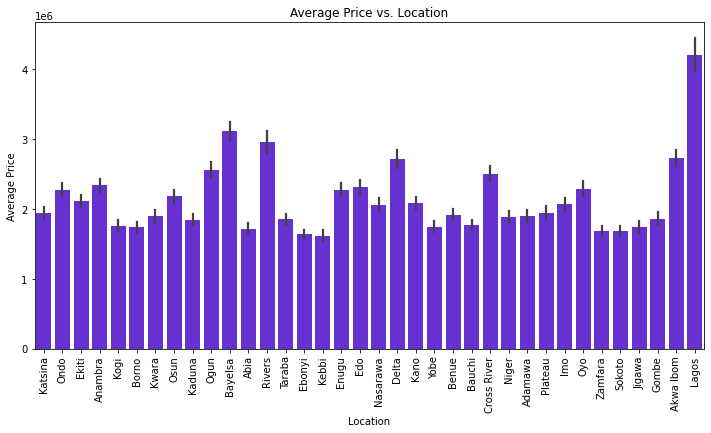

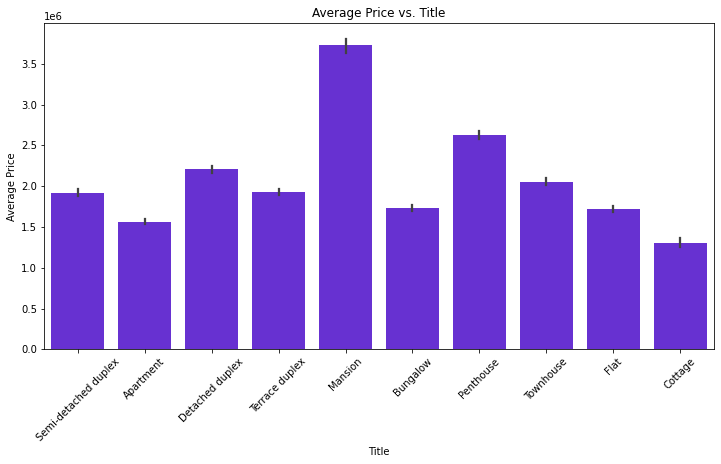

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relationship between 'loc' and 'price'
plt.figure(figsize=(12, 6))
sns.barplot(x='loc', y='price', data=train, color ='#5e17eb')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.title('Average Price vs. Location')
plt.xticks(rotation=90)
plt.show()

# Relationship between 'title' and 'price'
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='price', data=train, color ='#5e17eb')
plt.xlabel('Title')
plt.ylabel('Average Price')
plt.title('Average Price vs. Title')
plt.xticks(rotation=45)
plt.show()


From the Location Analysis:

The average prices of properties vary significantly across different states in Nigeria. Lagos stands out as the region with the highest average property price at approximately 4.21 million Naira, indicating a strong demand for real estate in the commercial hub.

On the other hand, Ebonyi, Kebbi, and Zamfara have relatively lower average property prices, suggesting a more affordable real estate market in those regions.


From the Title Analysis:

The type of property also plays a crucial role in determining its average price. Mansion properties command the highest average price of around 3.73 million Naira, making them the most expensive category.

Cottage properties have the lowest average price at approximately 1.31 million Naira, indicating a more budget-friendly option for buyers.


## Recommendation from analysis


The real estate company, Wazobia Real Estate Limited, should focus on leveraging the high demand in Lagos to offer premium properties and maximize profits.

The company could consider expanding its offerings in regions with a relatively lower average price, like Ebonyi, Kebbi, and Zamfara, to target budget-conscious customers.

Since location and title both significantly impact property prices, it is essential to incorporate these features into the predictive model for accurate price estimation.
made decisions on how to handle the missing values.
On Handling Missing Values:

   As the 'bedroom', 'bathroom', and 'parking_space' features exhibited skewed distributions, it would be recommended to fill their missing values with the median. Using the median is suitable in this case, as it is less sensitive to extreme values compared to the mean. For these features, advanced imputation methods could be affected by the skewed distribution, leading to potential inaccuracies in the imputed values.

   However, for 'loc' and 'title', which are categorical features, it is challenging to impute missing values accurately due to the lack of relevant information. Since there are only 1813 and 1722 missing values in 'loc' and 'title', respectively, and considering the size of the dataset, it is recommended to drop rows with missing values in these columns. Imputing these categorical features may introduce bias and potentially distort the analysis or predictive modeling.

On Correlation and Multicollinearity:

   The correlation matrix showed that 'bedroom', 'bathroom', and 'parking_space' have moderate positive correlations with 'price'. These features can be considered important predictors of house prices, and their relationships with 'price' can be explored further in modeling.

On Location and Property Type:
   The bar plots revealed the relationship between 'loc' and 'price', as well as 'title' and 'price'. They showed the average price for different locations and property types. The 'loc' and 'title' features are crucial in predicting house prices, as they significantly impact the average price.


   

   
EDA has provided us with valuable insights into the dataset, guiding us on the appropriate handling of missing values and identifying key predictors of house prices. It is essential to use robust and suitable imputation methods based on the distribution of the features. Additionally, the 'loc' and 'title' columns should be handled with care, and rows with missing values in these columns should be dropped to preserve data integrity and avoid biased analyses. The results obtained from this EDA will serve as a foundation for building predictive models that accurately estimate house prices for Wazobia Real Estate Limited.
